<a href="https://colab.research.google.com/github/shahriar00/Genetic-Disorder-Prediction/blob/main/Genetic_Disorder_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Read the data
df_train = pd.read_csv("/content/train.csv", encoding='utf-8')

In [ ]:
df_train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


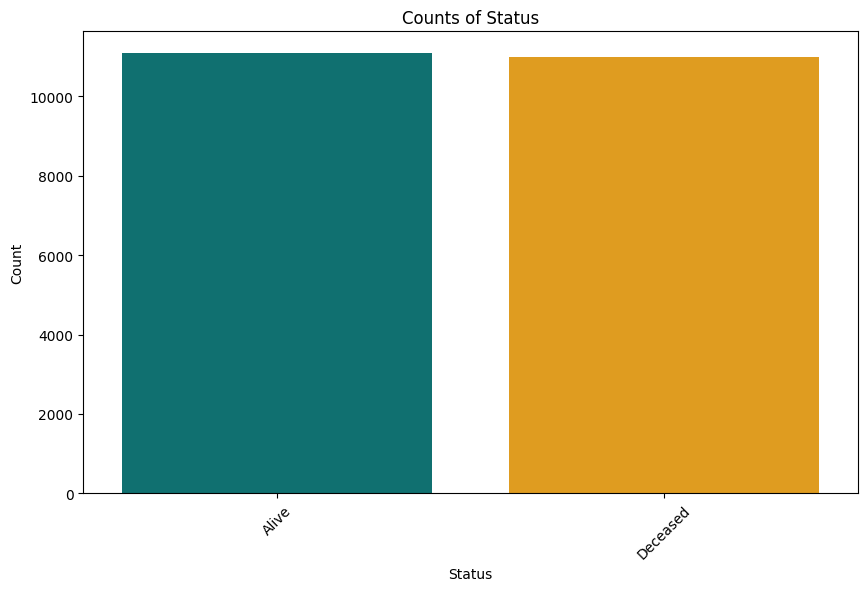

In [ ]:
# Define custom color palette
custom_palette = ["teal", "orange"]

# Assuming your DataFrame is named df_train
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Status', palette=custom_palette)
plt.title('Counts of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility if needed
plt.show()

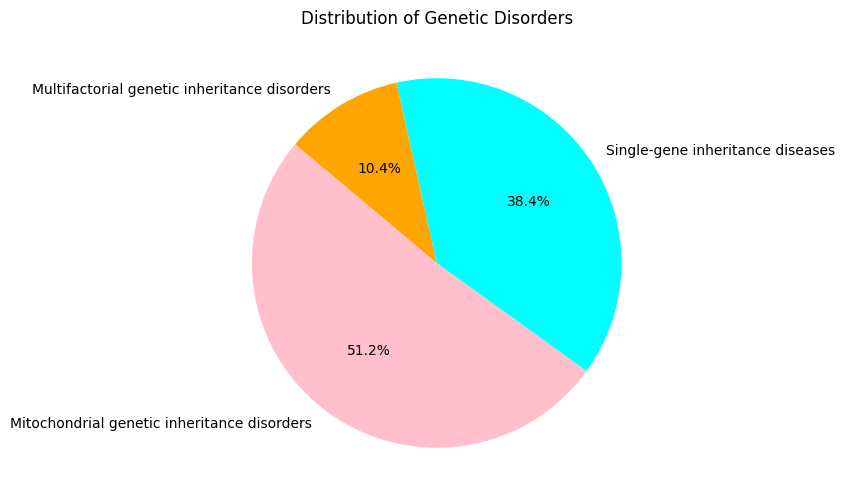

In [ ]:
import matplotlib.pyplot as plt
disorder_counts = df_train['Genetic Disorder'].value_counts()
custom_palette = ["pink", "cyan", "orange"]
plt.figure(figsize=(10, 6))
plt.pie(disorder_counts, labels=disorder_counts.index, colors=custom_palette, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genetic Disorders')
plt.show()


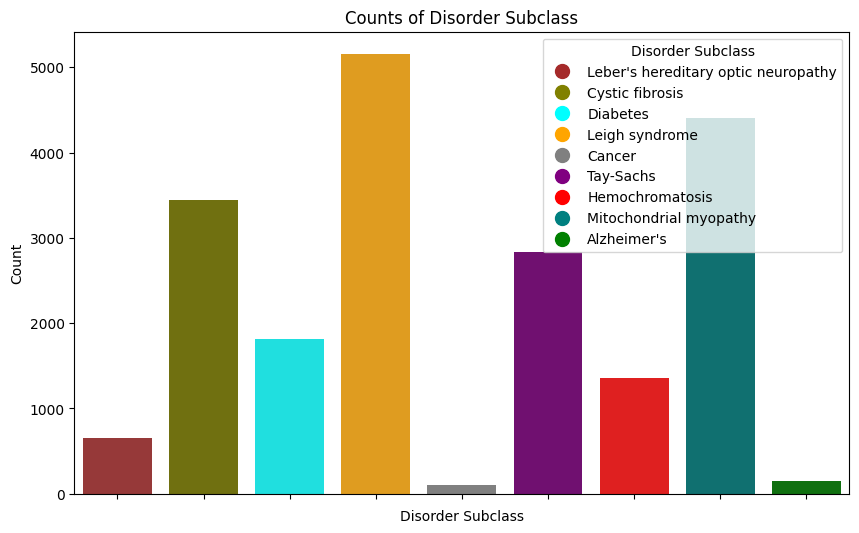

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define custom color palette
custom_palette = ["brown", "olive", "cyan", "orange", "grey", "purple", "red", "teal", "green"]

# Assuming your DataFrame is named df_train
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, x='Disorder Subclass', palette=custom_palette)
plt.title('Counts of Disorder Subclass')
plt.xlabel('Disorder Subclass')
plt.ylabel('Count')

# Remove x-tick labels
ax.set_xticklabels([''] * len(ax.get_xticklabels()))

# Filter out NaN values from the disorder subclasses
disorder_subclasses = df_train['Disorder Subclass'].dropna().unique()

# Create a legend for the custom palette, excluding NaN values
handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10)
           for color, subclass in zip(custom_palette, disorder_subclasses) if subclass in disorder_subclasses]
filtered_palette = [color for color, subclass in zip(custom_palette, df_train['Disorder Subclass'].unique()) if subclass in disorder_subclasses]
plt.legend(handles, disorder_subclasses, title='Disorder Subclass', loc='upper right')

plt.show()


In [ ]:
counts = df_train['Disorder Subclass'].value_counts()
print(counts)

Disorder Subclass
Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: count, dtype: int64


In [ ]:
df_train.drop(["Patient Id", "Family Name", "Patient First Name", "Father's name", "Institute Name", "Location of Institute", "Place of birth"], axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
columns = df_train.columns
column_types = df_train.dtypes

label_encoder = LabelEncoder()
scaler = StandardScaler()

for column in columns:
    if column_types[column] == 'object':  # Categorical data
        # Apply label encoding
        df_train[column] = label_encoder.fit_transform(df_train[column])

In [ ]:
df_train['Patient Age'].fillna(df_train['Patient Age'].mean(), inplace=True)

In [ ]:
df_train.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [ ]:
# Extract the mode of the column
mode_value = df_train['Inherited from father'].mode()[0]

# Fill missing values with the mode
df_train['Inherited from father'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Maternal gene'].mode()[0]

# Fill missing values with the mode
df_train['Maternal gene'].fillna(mode_value, inplace=True)

In [ ]:
df_train['Mother\'s age'].fillna(df_train['Mother\'s age'].mean(), inplace=True)

In [ ]:
df_train['Father\'s age'].fillna(df_train['Father\'s age'].mean(), inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Respiratory Rate (breaths/min)'].mode()[0]

# Fill missing values with the mode
df_train['Respiratory Rate (breaths/min)'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Heart Rate (rates/min'].mode()[0]

# Fill missing values with the mode
df_train['Heart Rate (rates/min'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Parental consent'].mode()[0]

# Fill missing values with the mode
df_train['Parental consent'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Follow-up'].mode()[0]

# Fill missing values with the mode
df_train['Follow-up'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Gender'].mode()[0]

# Fill missing values with the mode
df_train['Gender'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Birth asphyxia'].mode()[0]

# Fill missing values with the mode
df_train['Birth asphyxia'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Autopsy shows birth defect (if applicable)'].mode()[0]

# Fill missing values with the mode
df_train['Autopsy shows birth defect (if applicable)'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Folic acid details (peri-conceptional)'].mode()[0]

# Fill missing values with the mode
df_train['Folic acid details (peri-conceptional)'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['H/O serious maternal illness'].mode()[0]

# Fill missing values with the mode
df_train['H/O serious maternal illness'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['H/O radiation exposure (x-ray)'].mode()[0]

# Fill missing values with the mode
df_train['H/O radiation exposure (x-ray)'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['H/O substance abuse'].mode()[0]

# Fill missing values with the mode
df_train['H/O substance abuse'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Assisted conception IVF/ART'].mode()[0]

# Fill missing values with the mode
df_train['Assisted conception IVF/ART'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['History of anomalies in previous pregnancies'].mode()[0]

# Fill missing values with the mode
df_train['History of anomalies in previous pregnancies'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Birth defects'].mode()[0]

# Fill missing values with the mode
df_train['Birth defects'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Blood test result'].mode()[0]

# Fill missing values with the mode
df_train['Blood test result'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Genetic Disorder'].mode()[0]

# Fill missing values with the mode
df_train['Genetic Disorder'].fillna(mode_value, inplace=True)

In [ ]:
# Extract the mode of the column
mode_value = df_train['Disorder Subclass'].mode()[0]

# Fill missing values with the mode
df_train['Disorder Subclass'].fillna(mode_value, inplace=True)

In [ ]:
df_train['Test 1'].fillna(df_train['Test 1'].mean(), inplace=True)

In [ ]:
df_train['Test 2'].fillna(df_train['Test 2'].mean(), inplace=True)

In [ ]:
df_train['Test 3'].fillna(df_train['Test 3'].mean(), inplace=True)

In [ ]:
df_train['Test 4'].fillna(df_train['Test 4'].mean(), inplace=True)

In [ ]:
df_train['Test 5'].fillna(df_train['Test 5'].mean(), inplace=True)

In [ ]:
df_train['No. of previous abortion'].fillna(df_train['No. of previous abortion'].mean(), inplace=True)

In [ ]:
df_train['White Blood cell count (thousand per microliter)'].fillna(df_train['White Blood cell count (thousand per microliter)'].mean(), inplace=True)

In [ ]:
df_train['Symptom 1'].fillna(df_train['Symptom 1'].mean(), inplace=True)

In [ ]:
df_train['Symptom 2'].fillna(df_train['Symptom 2'].mean(), inplace=True)

In [ ]:
df_train['Symptom 3'].fillna(df_train['Symptom 3'].mean(), inplace=True)

In [ ]:
df_train['Symptom 4'].fillna(df_train['Symptom 4'].mean(), inplace=True)

In [ ]:
df_train['Symptom 5'].fillna(df_train['Symptom 5'].mean(), inplace=True)

In [ ]:
df_train.isnull().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
Parental consent                                    0
Follow-up                                           0
Gender                      

In [ ]:
df_train["total test"]=(df_train["Test 1"]+df_train["Test 2"]+df_train["Test 3"]+df_train["Test 4"]+df_train["Test 5"])/5

In [ ]:
df_train = df_train[(df_train >= 0).all(1)]

In [ ]:
df_train["total symptom"] = (df_train["Symptom 1"] + df_train["Symptom 2"] + df_train["Symptom 3"] + df_train["Symptom 4"] + df_train["Symptom 5"]) / 5


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 40 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float64
 1   Genes in mother's side                            22083 non-null  int64  
 2   Inherited from father                             22083 non-null  int64  
 3   Maternal gene                                     22083 non-null  int64  
 4   Paternal gene                                     22083 non-null  int64  
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  float64
 7   Father's age                                      22083 non-null  float64
 8   Status                                            22083 non-null  int64  
 9   Respiratory Rate 

In [ ]:
df_train.drop(["Test 1", "Test 2", "Test 3", "Test 4", "Test 5"], axis=1,inplace=True)
df_train.drop(["Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5"], axis=1,inplace=True)

In [ ]:
df_train.head(20)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder,Disorder Subclass,total test,total symptom
0,2.000000,1,0,1,0,4.760603,34.526454,41.972852,0,0,...,0,1,2.003062,2,9.857562,4,0,5,0.2,1.000000
1,4.000000,1,1,0,0,4.910669,34.526454,23.000000,1,1,...,0,1,2.003062,0,5.522560,2,3,2,0.2,0.710377
2,6.000000,1,0,0,0,4.893297,41.000000,22.000000,0,0,...,1,1,4.000000,1,7.486224,2,1,3,0.2,0.800000
3,12.000000,1,0,1,0,4.705280,21.000000,41.972852,1,1,...,2,1,1.000000,1,7.919321,1,0,6,0.2,0.200000
4,11.000000,1,0,2,1,4.720703,32.000000,41.972852,0,1,...,1,0,4.000000,0,4.098210,4,1,1,0.2,0.092383
5,14.000000,1,0,1,0,5.103188,34.526454,41.972852,1,2,...,2,0,0.000000,0,10.272230,2,2,2,0.2,0.400000
6,3.000000,1,0,1,1,4.901080,34.526454,63.000000,0,0,...,1,0,3.000000,0,6.825974,2,2,8,0.2,0.000000
7,3.000000,0,0,1,1,4.964816,40.000000,41.972852,0,1,...,0,1,1.000000,1,9.836352,1,2,8,0.2,0.299549
8,11.000000,0,0,1,0,5.209058,45.000000,44.000000,0,1,...,0,1,0.000000,0,6.669552,3,0,6,0.2,0.800000
9,4.000000,0,1,1,1,4.752272,44.000000,42.000000,0,1,...,1,1,1.000000,0,6.397702,0,1,3,0.2,0.600000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 30 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float64
 1   Genes in mother's side                            22083 non-null  int64  
 2   Inherited from father                             22083 non-null  int64  
 3   Maternal gene                                     22083 non-null  int64  
 4   Paternal gene                                     22083 non-null  int64  
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  float64
 7   Father's age                                      22083 non-null  float64
 8   Status                                            22083 non-null  int64  
 9   Respiratory Rate 

In [ ]:
df_train.drop_duplicates()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder,Disorder Subclass,total test,total symptom
0,2.0,1,0,1,0,4.760603,34.526454,41.972852,0,0,...,0,1,2.003062,2,9.857562,4,0,5,0.2,1.000000
1,4.0,1,1,0,0,4.910669,34.526454,23.000000,1,1,...,0,1,2.003062,0,5.522560,2,3,2,0.2,0.710377
2,6.0,1,0,0,0,4.893297,41.000000,22.000000,0,0,...,1,1,4.000000,1,7.486224,2,1,3,0.2,0.800000
3,12.0,1,0,1,0,4.705280,21.000000,41.972852,1,1,...,2,1,1.000000,1,7.919321,1,0,6,0.2,0.200000
4,11.0,1,0,2,1,4.720703,32.000000,41.972852,0,1,...,1,0,4.000000,0,4.098210,4,1,1,0.2,0.092383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,1,1,1,0,5.258298,35.000000,64.000000,1,0,...,1,0,3.000000,0,6.584811,1,0,6,0.2,0.200000
22079,8.0,0,1,0,1,4.974220,34.526454,56.000000,0,0,...,1,0,2.000000,0,7.041556,1,1,3,0.2,0.800000
22080,8.0,1,0,1,0,5.186470,35.000000,51.000000,1,1,...,0,0,2.000000,1,7.715464,2,0,7,0.2,0.292383
22081,7.0,1,0,1,1,4.858543,19.000000,41.972852,0,1,...,1,0,1.000000,0,8.437670,0,3,6,0.2,0.600000


In [ ]:
df_train.Status.value_counts()

Status
0    11083
1    11000
Name: count, dtype: int64

In [ ]:
df_train.shape

(22083, 30)

In [ ]:
import pandas as pd

# List of numerical columns to check for outliers
numerical_columns = [
    'Patient Age', 'Blood cell count (mcL)', 'Mother\'s age', 'Father\'s age',
    'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'No. of previous abortion',
    'White Blood cell count (thousand per microliter)', 'Blood test result', 'total test', 'total symptom'
]

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Assuming your DataFrame is named df_train
df_train = remove_outliers_iqr(df_train, numerical_columns)

# Check the shape of the DataFrame after removing outliers
print(df_train.shape)


(21940, 30)


In [ ]:
df_train.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Genetic Disorder', 'Disorder Subclass', 'total test', 'total symptom'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(df_train.drop('Status', axis=1), df_train['Status'])

Y = df_train['Status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(selected_features, Y, test_size= 0.2, random_state = 20)

In [ ]:
df_train.isnull().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Parental consent                                    0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (x-ra

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Instantiate the Support Vector Classifier with linear kernel and a smaller C value
linear_svc = SVC(kernel='linear', C=100)  # Reduced C to help with regularization

# Fit the classifier to the imputed training set
linear_svc.fit(X_train, Y_train)

# Make predictions on the test set
svm_pred = linear_svc.predict(X_test)

# Compute accuracy score and print it
accuracy_svm = accuracy_score(Y_test, svm_pred)
print('Model accuracy score with linear kernel and C=1.0: {:.4f}'.format(accuracy_svm))


Model accuracy score with linear kernel and C=1.0: 0.8603


In [ ]:
# import joblib
# # Save the model to a file
# joblib.dump(linear_svc100, 'svm_model.pkl')

In [ ]:
# # Instantiate the Support Vector Classifier with linear kernel and C=100.0
# linear_svc100 = SVC(kernel = 'linear',C=100.0)

# # Fit the classifier to the imputed training set
# linear_svc100.fit(X_train, Y_train)

# # Make predictions on the test set
# svm_pred = linear_svc100.predict(X_test)

# # Compute accuracy score and print it
# accuracy = accuracy_score(Y_test, svm_pred)
# print('Model accuracy score with linear kernel and C=100.0: {:.4f}'.format(accuracy))

In [ ]:
# import joblib
# # Save the model to a file
# joblib.dump(linear_svc100, 'svm_model.pkl')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision
precision_svm = precision_score(Y_test, svm_pred)

# Compute recall
recall_svm = recall_score(Y_test, svm_pred)

# Compute F1 score
f1_svm = f1_score(Y_test, svm_pred)

# Print the results
print('Precision: {:.4f}'.format(precision_svm))
print('Recall: {:.4f}'.format(recall_svm))
print('F1 Score: {:.4f}'.format(f1_svm))

Precision: 1.0000
Recall: 0.7178
F1 Score: 0.8357


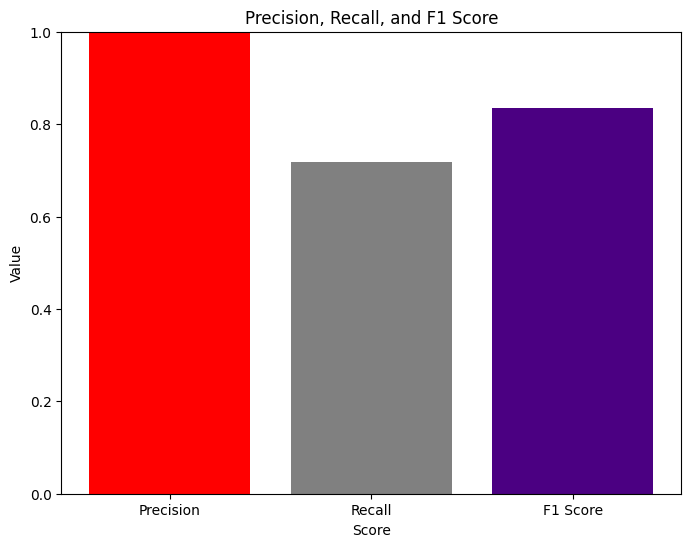

In [ ]:
import matplotlib.pyplot as plt

# Precision, Recall, and F1 score values
scores = [precision_svm, recall_svm, f1_svm]
score_names = ['Precision', 'Recall', 'F1 Score']

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(score_names, scores, color=['red', 'grey', 'indigo'])
plt.title('Precision, Recall, and F1 Score')
plt.xlabel('Score')
plt.ylabel('Value')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for better visualization
plt.show()

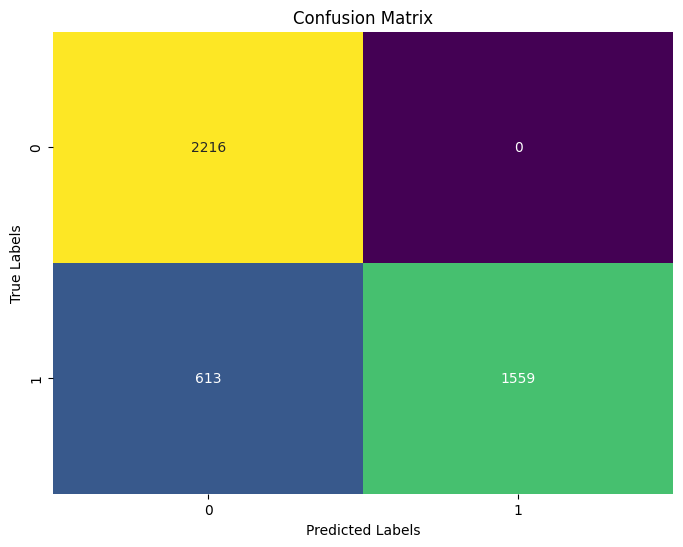

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, svm_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
knn_classifier = KNeighborsClassifier()

# Fit the classifier to the imputed training set
knn_classifier.fit(X_train, Y_train)

# Make predictions on the test set
knn_pred = knn_classifier.predict(X_test)

# Compute accuracy score and print it
accuracy_knn = accuracy_score(Y_test, knn_pred)
print('Model accuracy score with KNN: {:.4f}'.format(accuracy_knn))

Model accuracy score with KNN: 0.9754


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision
precision_knn = precision_score(Y_test, knn_pred, average='weighted')
print('Precision score with KNN: {:.4f}'.format(precision_knn))

# Compute recall
recall_knn = recall_score(Y_test, knn_pred, average='weighted')
print('Recall score with KNN: {:.4f}'.format(recall_knn))

# Compute F1 score
f1_knn = f1_score(Y_test, knn_pred, average='weighted')
print('F1 score with KNN: {:.4f}'.format(f1_knn))


Precision score with KNN: 0.9764
Recall score with KNN: 0.9754
F1 score with KNN: 0.9754


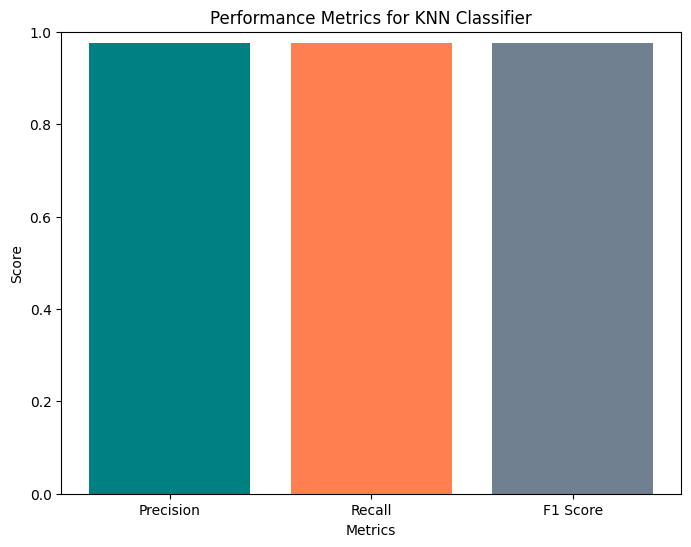

In [ ]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, knn_pred, average='weighted')
recall = recall_score(Y_test, knn_pred, average='weighted')
f1 = f1_score(Y_test, knn_pred, average='weighted')

# Plotting
scores = [precision_knn, recall_knn, f1_knn]
labels = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['teal', 'coral', 'slategray'])
plt.title('Performance Metrics for KNN Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for scores
plt.show()


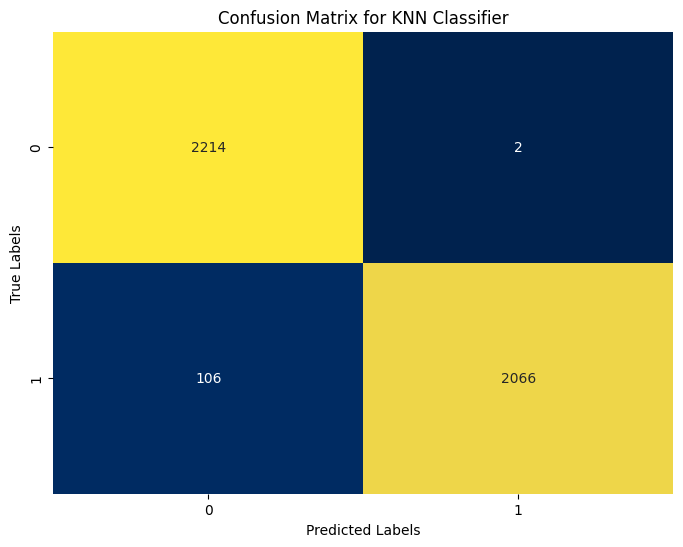

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, knn_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar=False)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a more regularized DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,  # Reduced max depth
    min_samples_split=50,  # Increased min samples split
    min_samples_leaf=20,  # Increased min samples leaf
    max_features='sqrt',  # Use sqrt of features for best split
    random_state=42
)

# Fit the classifier to the training set
decision_tree.fit(X_train, Y_train)

# Make predictions on the test set
dt_pred = decision_tree.predict(X_test)

# Compute accuracy score and print it
accuracy_dt = accuracy_score(Y_test, dt_pred)
print('Model accuracy score with more regularized Decision Tree: {:.4f}'.format(accuracy_dt))



Model accuracy score with more regularized Decision Tree: 0.9109


In [ ]:
# # Instantiate the DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=30, max_depth=2, min_samples_split=20, min_samples_leaf=30, max_features=9)

# # Fit the classifier to the imputed training set
# decision_tree.fit(X_train, Y_train)

# # Make predictions on the test set
# dt_pred = decision_tree.predict(X_test)

# # Compute accuracy score and print it
# accuracy = accuracy_score(Y_test, dt_pred)
# print('Model accuracy score with Decision Tree: {:.4f}'.format(accuracy))

In [ ]:
# import joblib
# # Save the model to a file
# joblib.dump(decision_tree, 'dt_model.pkl')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision
precision_dt = precision_score(Y_test, dt_pred, average='weighted')
print('Precision score with Decision Tree: {:.4f}'.format(precision))

# Compute recall
recall_dt = recall_score(Y_test, dt_pred, average='weighted')
print('Recall score with Decision Tree: {:.4f}'.format(recall))

# Compute F1 score
f1_dt = f1_score(Y_test, dt_pred, average='weighted')
print('F1 score with Decision Tree: {:.4f}'.format(f1))


Precision score with Decision Tree: 0.9428
Recall score with Decision Tree: 0.9355
F1 score with Decision Tree: 0.9352


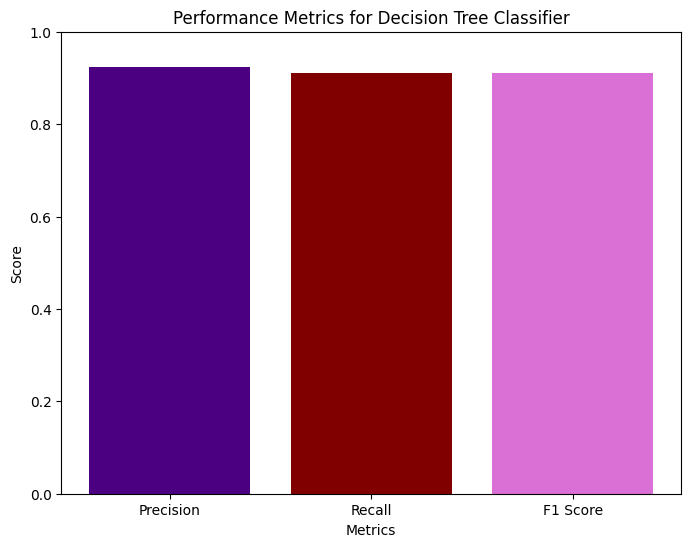

In [ ]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, dt_pred, average='weighted')
recall = recall_score(Y_test, dt_pred, average='weighted')
f1 = f1_score(Y_test, dt_pred, average='weighted')

# Plotting
scores = [precision_dt, recall_dt, f1_dt]
labels = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['indigo', 'maroon', 'orchid'])
plt.title('Performance Metrics for Decision Tree Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for scores
plt.show()


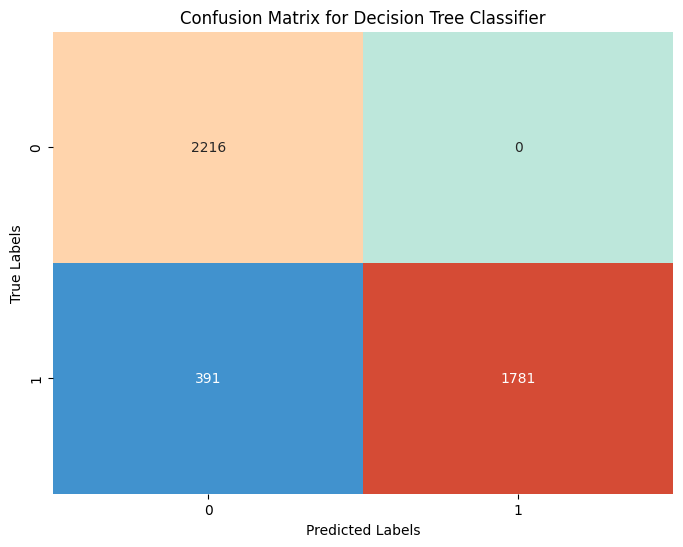

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, dt_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='icefire', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a more regularized RandomForestClassifier
random_forest = RandomForestClassifier(
    n_estimators=10,
    criterion='entropy',
    max_depth=5,  # Reduced max depth
    min_samples_split=10,  # Increased min samples split
    min_samples_leaf=10,  # Increased min samples leaf
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

# Fit the classifier to the training set
random_forest.fit(X_train, Y_train)

# Make predictions on the test set
rf_pred = random_forest.predict(X_test)

# Compute accuracy score and print it
accuracy_rf = accuracy_score(Y_test, rf_pred)
print('Model accuracy score with more regularized Random Forest: {:.4f}'.format(accuracy_rf))


Model accuracy score with more regularized Random Forest: 0.9672


In [ ]:
# # Instantiate the RandomForestClassifier
# random_forest = RandomForestClassifier(n_estimators=100,n_jobs=10,criterion="entropy")

# # Fit the classifier to the imputed training set
# random_forest.fit(X_train, Y_train)

# # Make predictions on the test set
# rf_pred = random_forest.predict(X_test)

# # Compute accuracy score and print it
# accuracy = accuracy_score(Y_test, rf_pred)
# print('Model accuracy score with Random Forest: {:.4f}'.format(accuracy))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision
precision_rf = precision_score(Y_test, rf_pred, average='weighted')
print('Precision score with Random Forest: {:.4f}'.format(precision))

# Compute recall
recall_rf = recall_score(Y_test, rf_pred, average='weighted')
print('Recall score with Random Forest: {:.4f}'.format(recall))

# Compute F1 score
f1_rf = f1_score(Y_test, rf_pred, average='weighted')
print('F1 score with Random Forest: {:.4f}'.format(f1))


Precision score with Random Forest: 0.9243
Recall score with Random Forest: 0.9109
F1 score with Random Forest: 0.9101


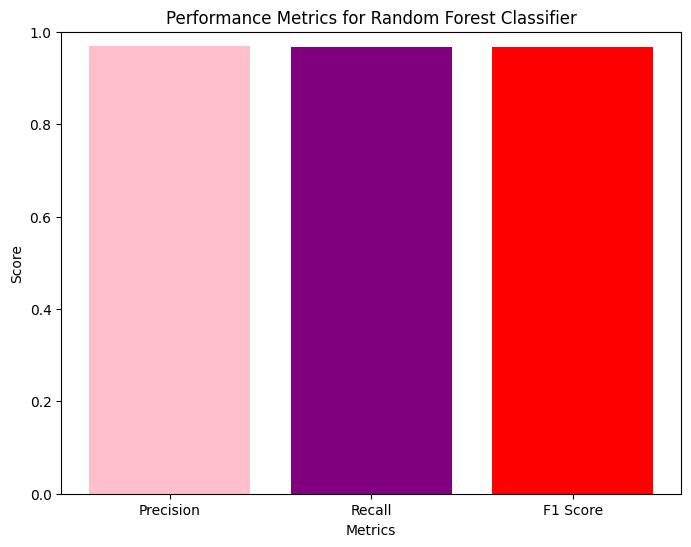

In [ ]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, rf_pred, average='weighted')
recall = recall_score(Y_test, rf_pred, average='weighted')
f1 = f1_score(Y_test, rf_pred, average='weighted')

# Plotting precision, recall, and F1 score
scores = [precision_rf, recall_rf, f1_rf]
labels = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['pink', 'purple', 'red'])
plt.title('Performance Metrics for Random Forest Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for scores
plt.show()

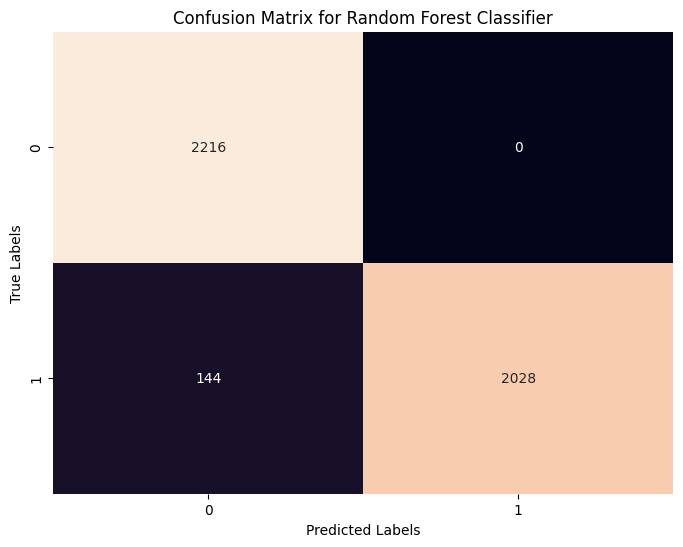

In [ ]:
# Visualizing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, rf_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Instantiate the LogisticRegression
logistic_regression = LogisticRegression()

# Fit the classifier to the imputed training set
logistic_regression.fit(X_train, Y_train)

# Make predictions on the test set
logistic_pred = logistic_regression.predict(X_test)

# Compute accuracy score and print it
accuracy_lr = accuracy_score(Y_test, logistic_pred)
print('Model accuracy score with Logistic Regression: {:.4f}'.format(accuracy_lr))

Model accuracy score with Logistic Regression: 0.8603


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision
precision_lr = precision_score(Y_test, logistic_pred, average='weighted')
print('Precision score with Logistic Regression: {:.4f}'.format(precision))

# Compute recall
recall_lr = recall_score(Y_test, logistic_pred, average='weighted')
print('Recall score with Logistic Regression: {:.4f}'.format(recall))

# Compute F1 score
f1_lr = f1_score(Y_test, logistic_pred, average='weighted')
print('F1 score with Logistic Regression: {:.4f}'.format(f1))


Precision score with Logistic Regression: 0.9692
Recall score with Logistic Regression: 0.9672
F1 score with Logistic Regression: 0.9671


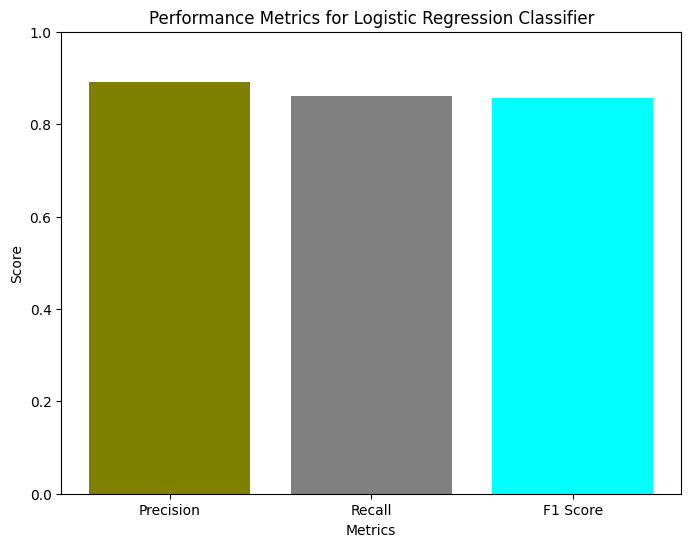

In [ ]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, logistic_pred, average='weighted')
recall = recall_score(Y_test, logistic_pred, average='weighted')
f1 = f1_score(Y_test, logistic_pred, average='weighted')

# Plotting precision, recall, and F1 score
scores = [precision_lr, recall_lr, f1_lr]
labels = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['olive', 'grey', 'cyan'])
plt.title('Performance Metrics for Logistic Regression Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for scores
plt.show()


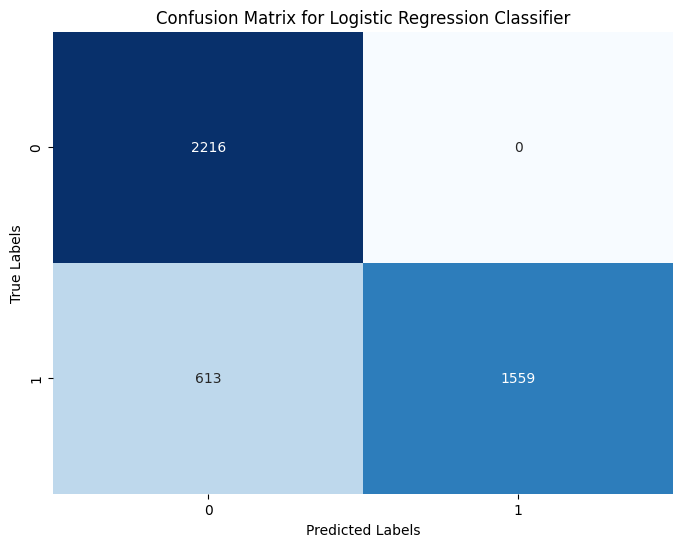

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, logistic_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define the Gradient Boosting Classifier with reduced complexity
gradient_boosting = GradientBoostingClassifier(
    n_estimators=7,  # Reduce the number of boosting stages
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=150,
    min_samples_leaf=150,
    max_features='sqrt',
    random_state=42
)

# Fit the classifier to the training set
gradient_boosting.fit(X_train, Y_train)

# Make predictions on the test set
gb_pred = gradient_boosting.predict(X_test)

# Compute accuracy score and print it
accuracy_gb = accuracy_score(Y_test, gb_pred)
print('Model accuracy score with Gradient Boosting Classifier: {:.4f}'.format(accuracy_gb))


Model accuracy score with Gradient Boosting Classifier: 0.9355


In [ ]:
# import joblib
# # Save the model to a file
# joblib.dump(xgb_classifier, 'xg_model.pkl')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision
precision_gb = precision_score(Y_test, gb_pred, average='weighted')
print('Precision score with XGBoost: {:.4f}'.format(precision_gb))

# Compute recall
recall_gb = recall_score(Y_test, gb_pred, average='weighted')
print('Recall score with XGBoost: {:.4f}'.format(recall_gb))

# Compute F1 score
f1_gb = f1_score(Y_test, gb_pred, average='weighted')
print('F1 score with XGBoost: {:.4f}'.format(f1_gb))


Precision score with XGBoost: 0.9428
Recall score with XGBoost: 0.9355
F1 score with XGBoost: 0.9352


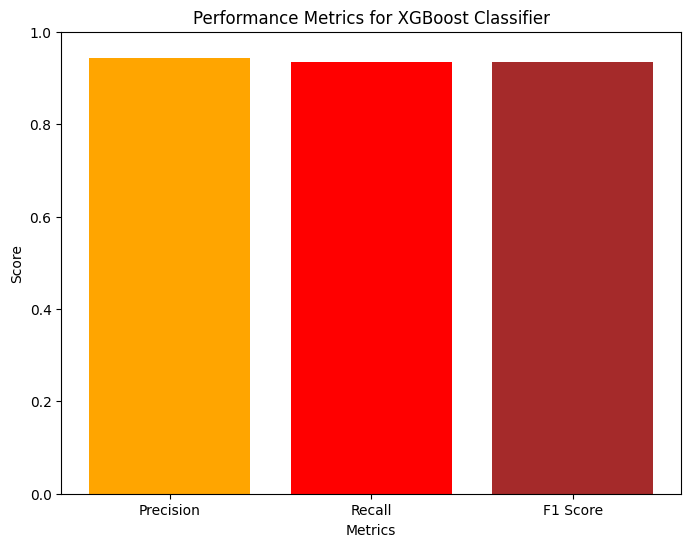

In [ ]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, gb_pred, average='weighted')
recall = recall_score(Y_test, gb_pred, average='weighted')
f1 = f1_score(Y_test, gb_pred, average='weighted')

# Plotting precision, recall, and F1 score
scores = [precision_gb, recall_gb, f1_gb]
labels = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['orange', 'red', 'brown'])
plt.title('Performance Metrics for XGBoost Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for scores
plt.show()


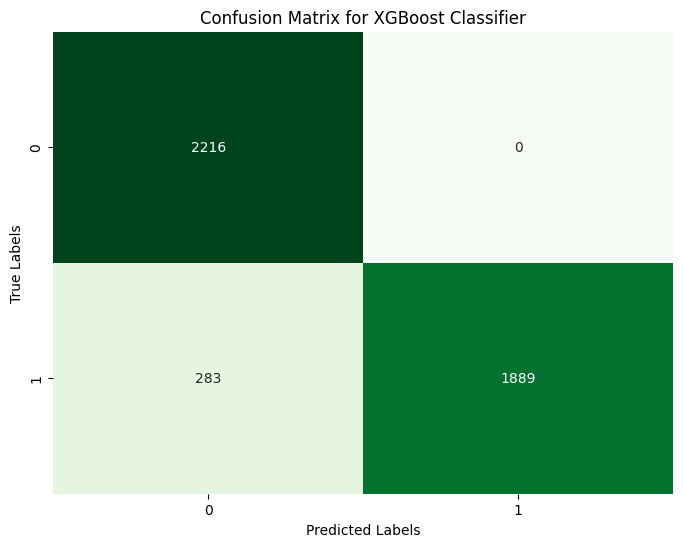

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, gb_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


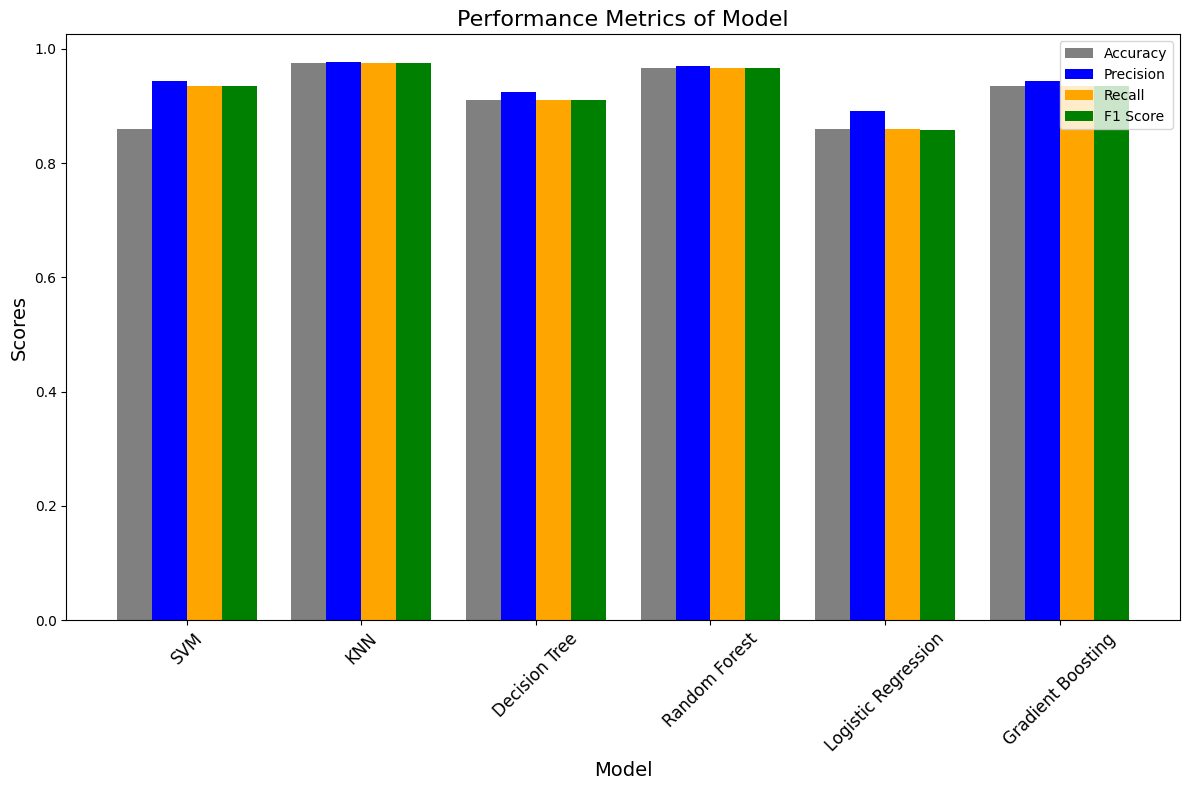

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classifiers and their corresponding performance metrics
classifiers = ['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting']
accuracy_scores = [accuracy_svm, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_lr, accuracy_gb]
precision_scores = [precision, precision_knn, precision_dt, precision_rf, precision_lr, precision_gb]
recall_scores = [recall, recall_knn, recall_dt, recall_rf, recall_lr, recall_gb]
f1_scores = [f1, f1_knn, f1_dt, f1_rf, f1_lr, f1_gb]

# Define the number of classifiers
num_classifiers = len(classifiers)

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = np.arange(num_classifiers)

# Plotting the grouped bar plot
plt.figure(figsize=(12, 8))

# Plotting accuracy scores
plt.bar(index - 1.5 * bar_width, accuracy_scores, bar_width, label='Accuracy', color='gray')

# Plotting precision scores
plt.bar(index - 0.5 * bar_width, precision_scores, bar_width, label='Precision', color='blue')

# Plotting recall scores
plt.bar(index + 0.5 * bar_width, recall_scores, bar_width, label='Recall', color='orange')

# Plotting F1 scores
plt.bar(index + 1.5 * bar_width, f1_scores, bar_width, label='F1 Score', color='green')

# Adding labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance Metrics of Model', fontsize=16)
plt.xticks(index, classifiers, rotation=45, fontsize=12)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, roc_auc_score

# # Calculate ROC curve and AUC for each model
# models = {
#     # 'Linear SVM (C=100.0)': linear_svc,
#     'KNN': knn_classifier,
#     'Decision Tree': decision_tree,
#     'Random Forest': random_forest,
#     'Logistic Regression': logistic_regression,
#     'Gradient Boosting Classifier': gradient_boosting  # Updated name here
# }

# plt.figure(figsize=(10, 8))

# for name, model in models.items():
#     if hasattr(model, "predict_proba"):
#         probs = model.predict_proba(X_test)
#         preds = probs[:, 1]
#     else:
#         preds = model.decision_function(X_test)

#     fpr, tpr, threshold = roc_curve(Y_test, preds)
#     auc = roc_auc_score(Y_test, preds)

#     plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()


**Hybrid Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define classifiers for the hybrid model, including KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

svm_classifier = SVC(kernel='linear', C=1.0, probability=True)

random_forest = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=5,
    min_samples_split=100,
    min_samples_leaf=50,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)
gradient_boosting = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=100,
    min_samples_leaf=50,
    max_features='sqrt',
    random_state=42
)

# Define the hybrid model by combining multiple classifiers
hybrid_model = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),
        ('svm', svm_classifier),
        ('random_forest', random_forest),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='soft'  # Soft voting for probability averaging
)

# Train the hybrid model
hybrid_model.fit(X_train, Y_train)

# Make predictions on the test set using the hybrid model
hybrid_pred = hybrid_model.predict(X_test)

# Compute accuracy score of the hybrid model
accuracy = accuracy_score(Y_test, hybrid_pred)
print('Model accuracy score with Hybrid Model: {:.4f}'.format(accuracy))

Model accuracy score with Hybrid Model: 0.9959


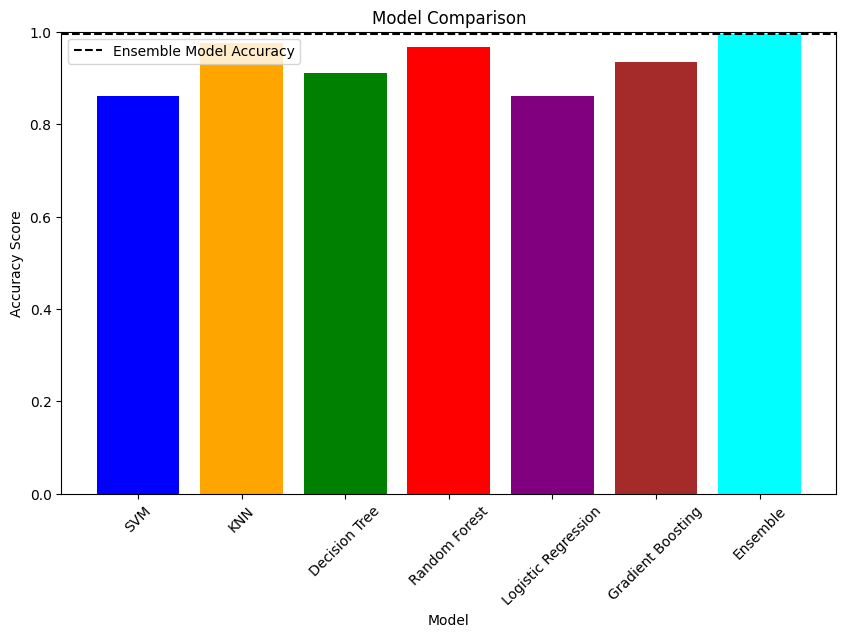

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores of individual models
individual_models = {
    'SVM': accuracy_score(Y_test, svm_pred),
    'KNN': accuracy_score(Y_test, knn_pred),
    'Decision Tree': accuracy_score(Y_test, dt_pred),
    'Random Forest': accuracy_score(Y_test, rf_pred),
    'Logistic Regression': accuracy_score(Y_test, logistic_pred),
    'Gradient Boosting': accuracy_score(Y_test, gb_pred)
}

# Accuracy score of the hybrid model
hybrid_accuracy = accuracy_score(Y_test, hybrid_pred)

# Add hybrid model to individual models dictionary
individual_models['Ensemble'] = hybrid_accuracy

# Plot the comparison graph
plt.figure(figsize=(10, 6))
plt.bar(individual_models.keys(), individual_models.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.ylim(0.0, 1.0)  # Set y-axis limit to ensure visibility of bars
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.axhline(hybrid_accuracy, color='black', linestyle='--', label='Ensemble Model Accuracy')
plt.legend()
plt.show()


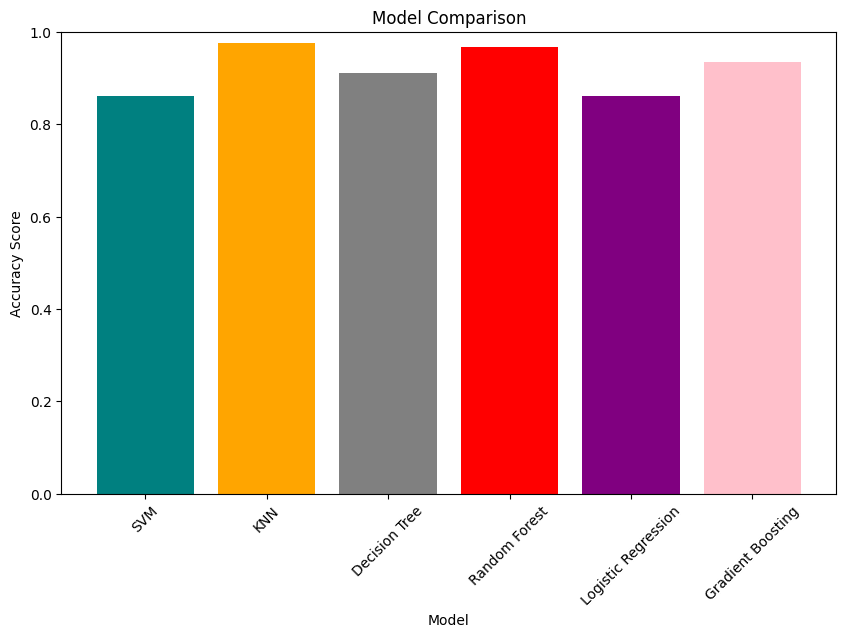

In [ ]:
# Accuracy scores of individual models excluding hybrid
individual_models_without_hybrid = {
    'SVM': accuracy_score(Y_test, svm_pred),
    'KNN': accuracy_score(Y_test, knn_pred),
    'Decision Tree': accuracy_score(Y_test, dt_pred),
    'Random Forest': accuracy_score(Y_test, rf_pred),
    'Logistic Regression': accuracy_score(Y_test, logistic_pred),
    'Gradient Boosting': accuracy_score(Y_test, gb_pred)
}

# Plot the comparison graph
plt.figure(figsize=(10, 6))
plt.bar(individual_models_without_hybrid.keys(), individual_models_without_hybrid.values(), color=['teal', 'orange', 'grey', 'red', 'purple', 'pink'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.ylim(0.0, 1.0)  # Set y-axis limit to ensure visibility of bars
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

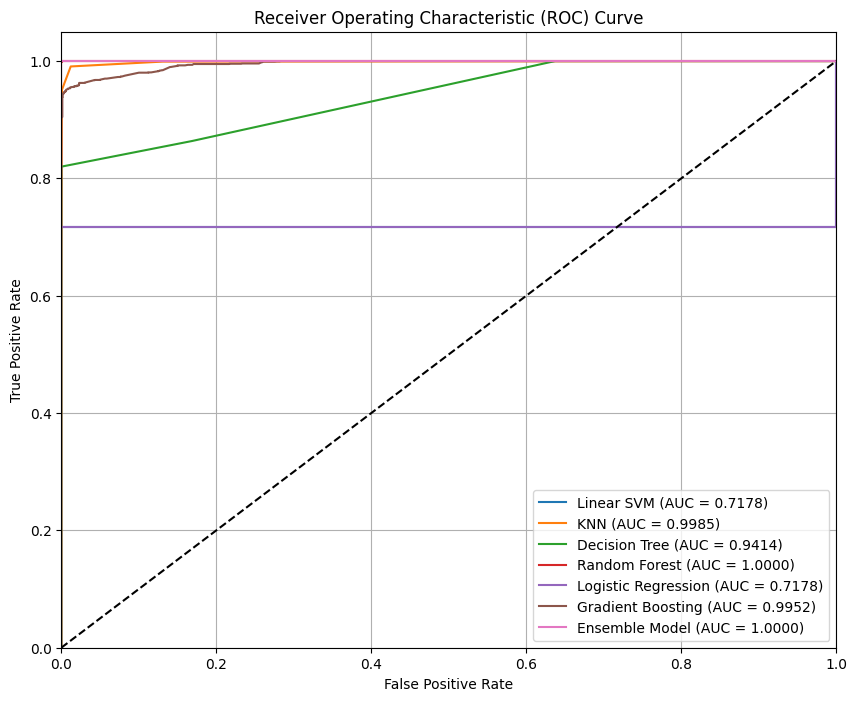

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# For linear SVM
svm_proba = linear_svc.decision_function(X_test)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm_proba)
svm_auc = roc_auc_score(Y_test, svm_proba)

# For KNN
knn_proba = knn_classifier.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_proba)
knn_auc = roc_auc_score(Y_test, knn_proba)

# For Decision Tree
dt_proba = decision_tree.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(Y_test, dt_proba)
dt_auc = roc_auc_score(Y_test, dt_proba)

# For Random Forest
rf_proba = random_forest.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_proba)
rf_auc = roc_auc_score(Y_test, rf_proba)

# For Logistic Regression
logistic_proba = logistic_regression.predict_proba(X_test)[:, 1]
logistic_fpr, logistic_tpr, _ = roc_curve(Y_test, logistic_proba)
logistic_auc = roc_auc_score(Y_test, logistic_proba)

# For Gradient Boosting
gb_proba = gradient_boosting.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(Y_test, gb_proba)
gb_auc = roc_auc_score(Y_test, gb_proba)

# For Hybrid Model
hybrid_proba = hybrid_model.predict_proba(X_test)[:, 1]
hybrid_fpr, hybrid_tpr, _ = roc_curve(Y_test, hybrid_proba)
hybrid_auc = roc_auc_score(Y_test, hybrid_proba)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))

plt.plot(svm_fpr, svm_tpr, label='Linear SVM (AUC = {:.4f})'.format(svm_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.4f})'.format(knn_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.4f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.4f})'.format(rf_auc))
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Regression (AUC = {:.4f})'.format(logistic_auc))
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (AUC = {:.4f})'.format(gb_auc))
plt.plot(hybrid_fpr, hybrid_tpr, label='Ensemble Model (AUC = {:.4f})'.format(hybrid_auc))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# # Combine predictions (simple averaging for simplicity)
# hybrid_pred = np.mean([svm_pred, dt_pred, rf_pred, logistic_pred, knn_pred, gb_pred], axis=0)

# # Round predictions to convert to binary classification
# hybrid_pred = np.round(hybrid_pred)

# # Evaluate accuracy
# accuracy = accuracy_score(Y_test, hybrid_pred)
# print("Hybrid Model Accuracy:", accuracy)

In [ ]:
# xgb_classifier = XGBClassifier()

# xgb_classifier.fit(X_train, Y_train)

# xg_boost_pred = xgb_classifier.predict(X_test)

# accuracy = accuracy_score(Y_test, xg_boost_pred)
# print('Model accuracy score with XGBoost: {:.4f}'.format(accuracy))

**This is the Extra Part of the code Tools**

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical

# # Convert target to categorical
# y = label_encoder.fit_transform(Y)
# y = to_categorical(Y)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# # Build the ANN
# model = Sequential()
# model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(y_train.shape[1], activation='softmax'))  # Corrected this line

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Accuracy: {accuracy * 100:.2f}%")